In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, poisson, gamma
from sklearn.preprocessing import StandardScaler


## Business Questions:


Descriptive Analytics

    Sales Analysis: What are the total sales for each product category across different channels and regions? This involves summarizing current sales data to understand what products are performing well.
    Customer Segmentation: How do customers differ in their spending across different product categories? This can involve cluster analysis to identify different types of customers based on their purchasing patterns.
    Market Analysis: What are the differences in purchasing patterns across regions? Are there specific product categories that are more popular in certain regions?

Inferential Analytics

    Comparative Analysis: Is there a significant difference in the average spending on different product categories between the two channels? This could involve hypothesis testing to compare means across groups.
    Association Rules: Are there certain products that are frequently bought together? This could involve using market basket analysis to find associations between different products.
    Regional Preferences: Are there significant differences in purchasing habits across different regions? This could involve statistical tests to compare regional data.

Predictive Analytics

    Sales Forecasting: Can we predict future sales for each product category based on historical data? This would involve using time series analysis or machine learning models for sales forecasting.
    Customer Spending Prediction: Can we predict how much a new customer will spend in each category based on their demographics or initial purchases? This involves building a predictive model.
    Churn Prediction: Can we predict which customers are likely to stop buying (churn) based on their purchasing patterns? This involves identifying patterns that precede churn and building a predictive model.

In [48]:
df = pd.read_csv('wholesale.csv')
print (df.head(5) , "\n")
print ((df.sum() / df.sum().sum()) * 100)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185 

Channel              0.003981
Region               0.007653
Fresh               36.112841
Milk                17.442869
Grocery             23.928007
Frozen               9.244453
Detergents_Paper     8.671360
Delicassen           4.588836
dtype: float64


Looks like the top selling products are Fresh, Milk and Groceries. Numbers are expenditure of clients in monetary units

## Descriptive Statistics

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen     Cluster  
count    440.000000        440.000000    440.000000  440.000000  
mean    3071.931818       2881.493182   1524.870455    0.325000  
std     4854.673333       4767.854448   2820.105937    0.679215  
min       25.000000          3.000000      3.000000

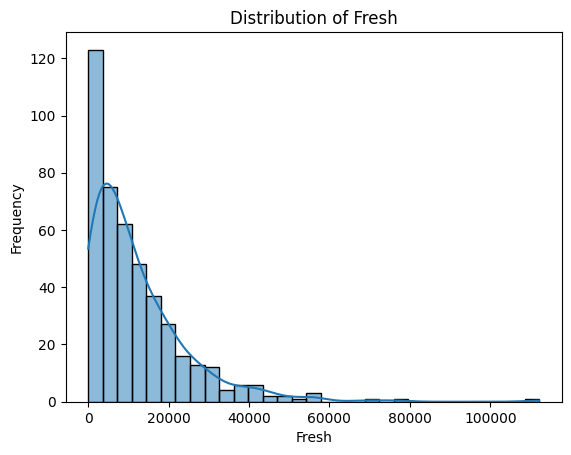

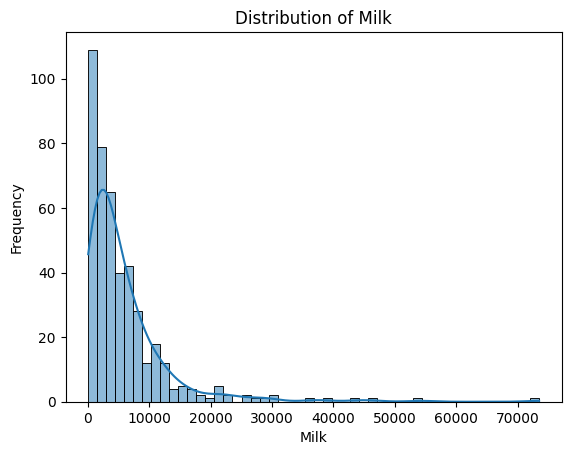

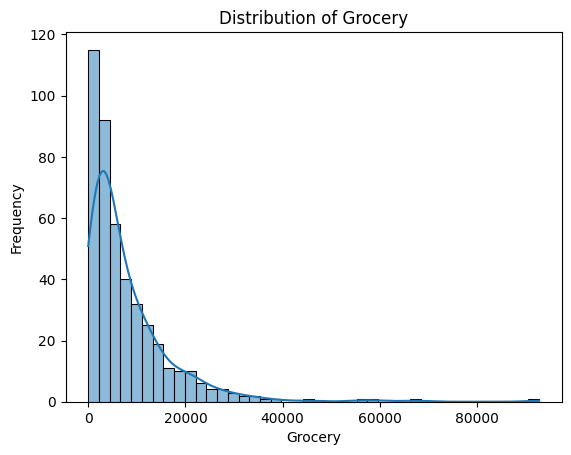

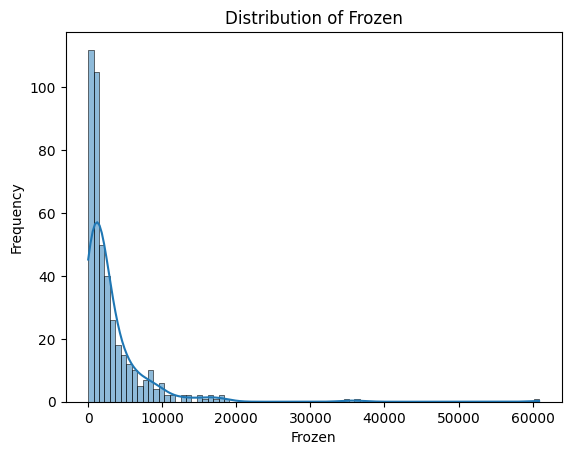

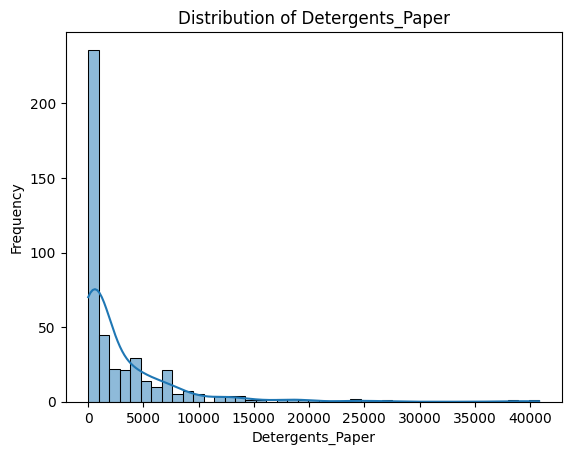

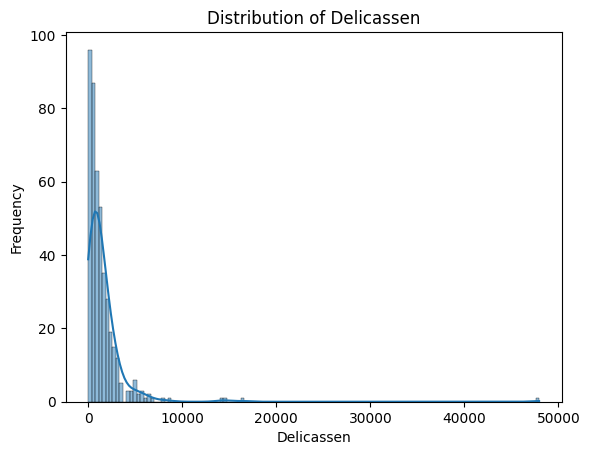

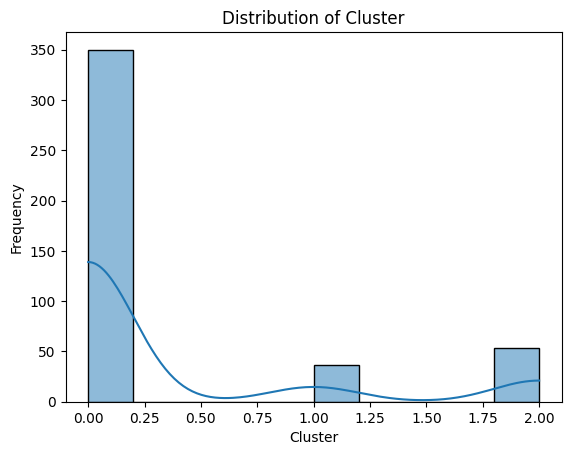

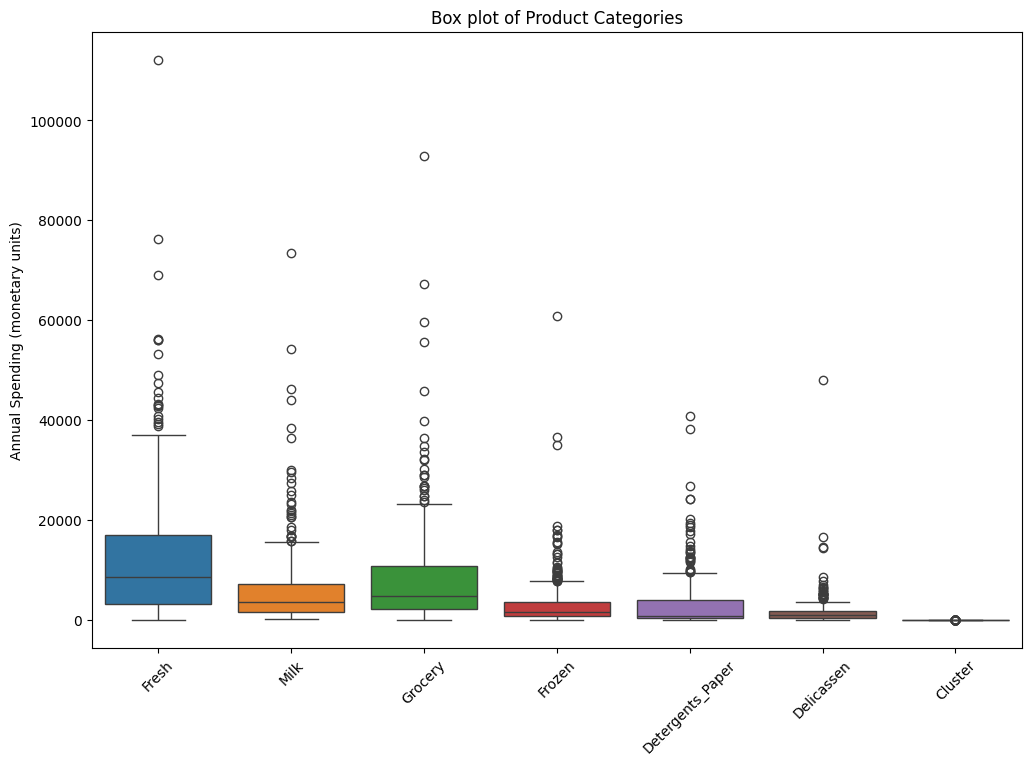

In [40]:
# Basic descriptive statistics for each category
print(df.describe())

# Visualize the distribution of each category with histograms
for column in df.columns[2:]:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for each category to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 2:])
plt.title('Box plot of Product Categories')
plt.ylabel('Annual Spending (monetary units)')
plt.xticks(rotation=45)
plt.show()


## Probability

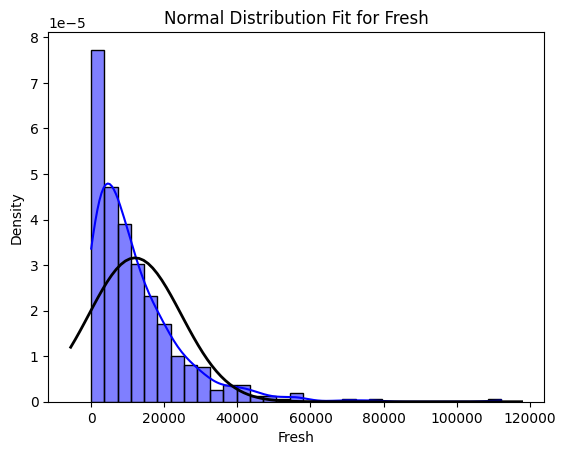

Normal Fit for Fresh: Mean = 12000.3, Std = 12632.95


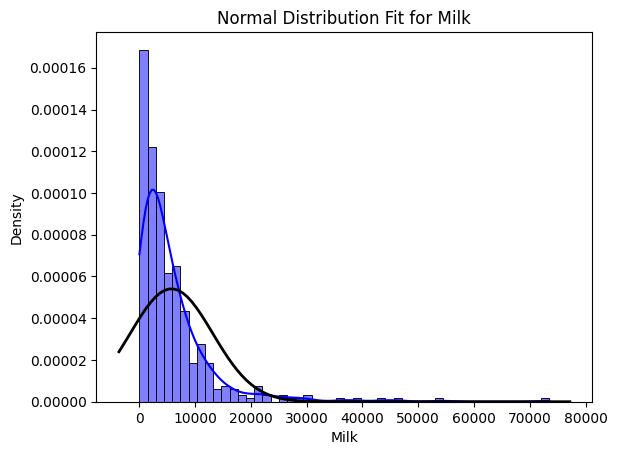

Normal Fit for Milk: Mean = 5796.27, Std = 7371.99


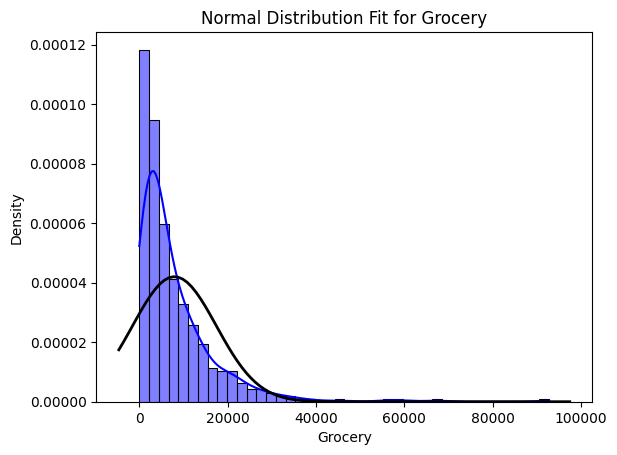

Normal Fit for Grocery: Mean = 7951.28, Std = 9492.36


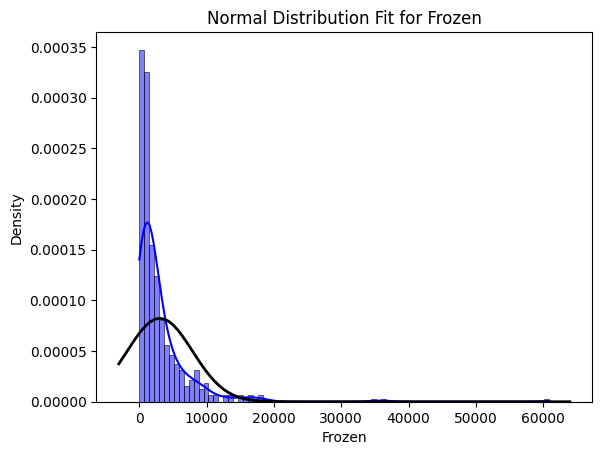

Normal Fit for Frozen: Mean = 3071.93, Std = 4849.15


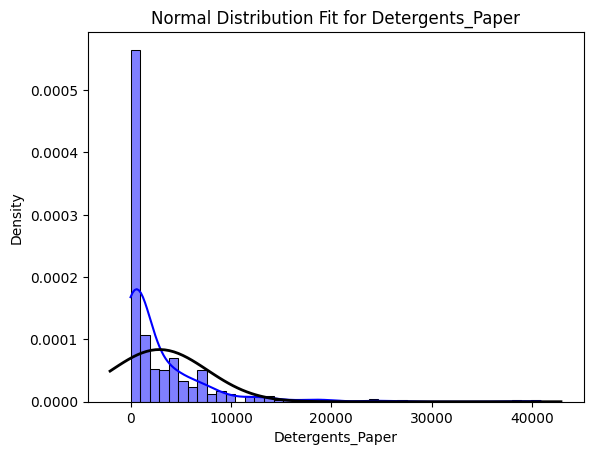

Normal Fit for Detergents_Paper: Mean = 2881.49, Std = 4762.43


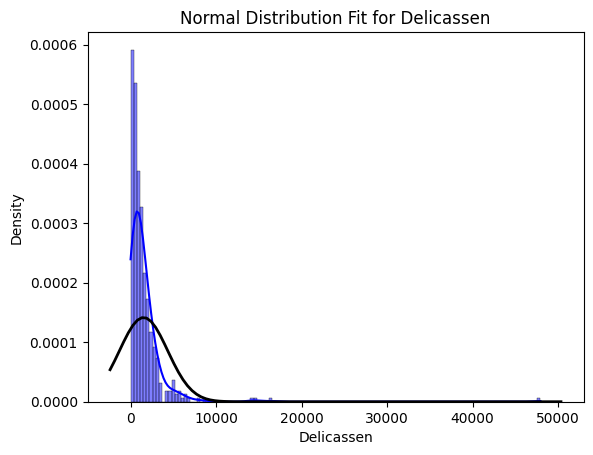

Normal Fit for Delicassen: Mean = 1524.87, Std = 2816.9


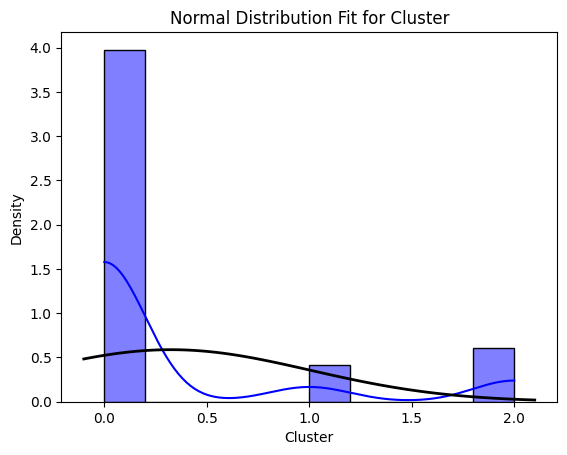

Normal Fit for Cluster: Mean = 0.32, Std = 0.68
Expected number of purchases (lambda) for 'Frozen': 3071.93


In [41]:
## Normal Distribution Fit
for column in df.columns[2:]:
    mu, std = stats.norm.fit(df[column])
    plt.figure()
    sns.histplot(df[column], kde=True, stat='density', color='blue')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Normal Distribution Fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    print(f"Normal Fit for {column}: Mean = {round(mu, 2)}, Std = {round(std, 2)}")

## Poisson Distribution for 'Frozen'
lambda_frozen = df['Frozen'].mean()
print(f"Expected number of purchases (lambda) for 'Frozen': {round(lambda_frozen, 2)}")


T-test for 'Fresh' between Channels 1 and 2: T-stat=3.59, P-value=0.0


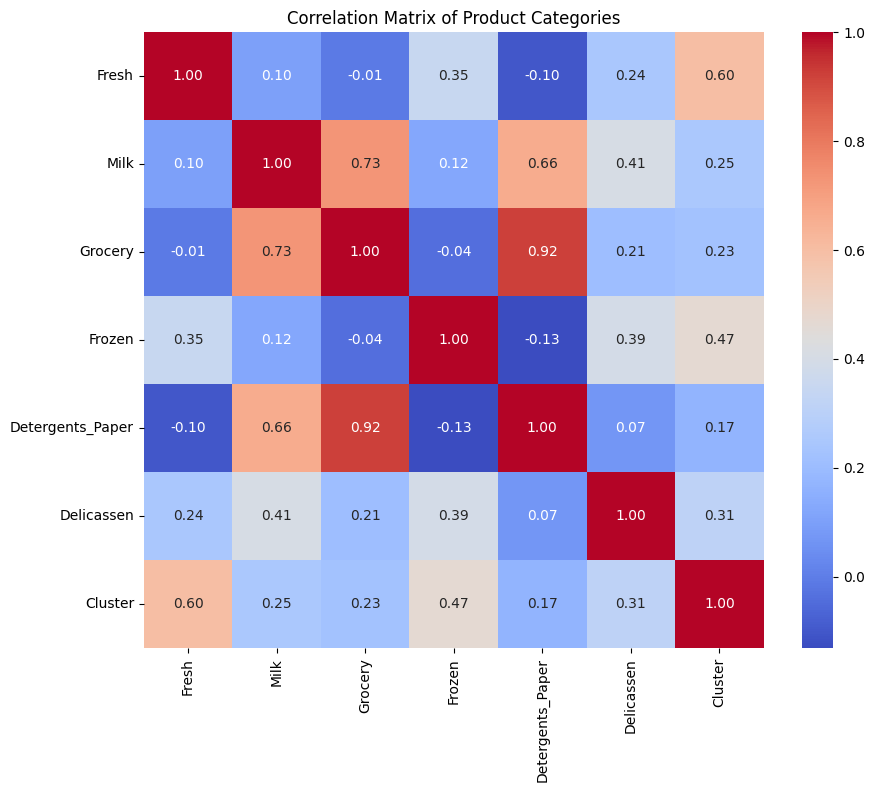

In [44]:
# Comparing the mean spending on 'Fresh' between two channels
t_stat, p_val = stats.ttest_ind(df[df['Channel'] == 1]['Fresh'], df[df['Channel'] == 2]['Fresh'])
print(f"T-test for 'Fresh' between Channels 1 and 2: T-stat={round(t_stat, 2)}, P-value={round(p_val, 2)}")

## Correlations Between Categories
# Heatmap of Pearson correlation coefficients between product categories
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Product Categories')
plt.show()
